In [19]:
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk

import shapely.wkt as wkt
path = r"C:\Users\daiyu\Desktop\LIBRARY_20240718.csv" ## Replace with your file path
df = pd.read_csv(path)
df['geometry'] = df['the_geom'].apply(wkt.loads)
del df['the_geom']
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

In [22]:
columns_of_interest = ['NAME', 'STREETNAME', 'CITY']
gdf[columns_of_interest].head()

,NAME,STREETNAME,CITY
0,115th Street,West 115th Street,New York
1,125th Street,East 125th Street,New York
2,53rd Street,West 53rd Street,New York
3,58th Street,East 58th Street,New York
4,67th Street,East 67th Street,New York


<Axes: >

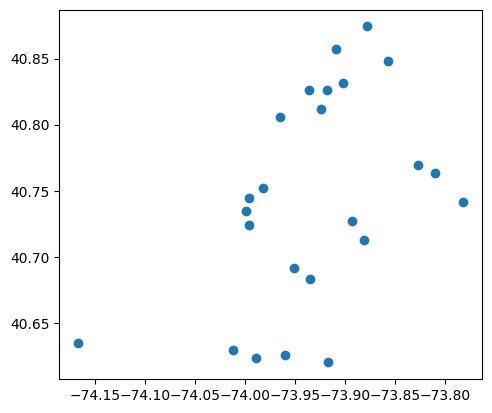

In [25]:
mask = gdf['NAME'].str.contains('M', na=False)
gdf[mask].plot()

<Axes: >

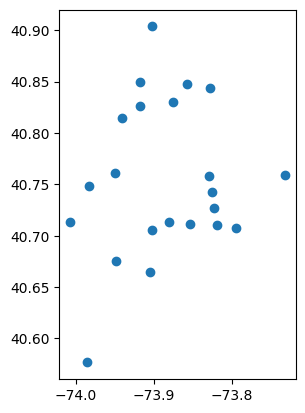

In [28]:
mask = gdf['STREETNAME'].str.contains('M', na=False)
gdf[mask].plot()

In [5]:
# pluto = gpd.read_file("C:\Users\daiyu\Desktop\LIBRARY_20240718.csv")

In [6]:
pluto_ogrio = ogr.read_dataframe(r"C:\Users\daiyu\Desktop\LIBRARY_20240718.csv")

In [7]:
pluto_ogrio.columns

Index(['the_geom', 'NAME', 'STREETNAME', 'HOUSENUM', 'CITY', 'ZIP', 'URL',
       'BIN', 'BBL', 'X', 'Y', 'SYSTEM', 'BOROCODE'],
      dtype='object')

In [8]:
pluto_ogrio.dtypes

the_geom      object
NAME          object
STREETNAME    object
HOUSENUM      object
CITY          object
ZIP           object
URL           object
BIN           object
BBL           object
X             object
Y             object
SYSTEM        object
BOROCODE      object
dtype: object

In [9]:
pluto_ogrio.SYSTEM.value_counts()

SYSTEM
NYPL    92
QPL     65
BPL     59
Name: count, dtype: int64

In [10]:
# now we can remap the numbers into something more meaningful

land_use_codes = {
    "01": "NYPL",
    "02": "QPL",
    "03": "BPL", 
}

In [11]:
pluto_ogrio["SYSTEM"] = pluto_ogrio.SYSTEM.map(land_use_codes)

In [13]:
pluto_ogrio.groupby(["SYSTEM","HOUSENUM"])

In [29]:
pluto_ogrio.groupby("SYSTEM").X.sum().sort_values(ascending=False).plot.bar()
plt.title("Library by housenum")

TypeError: no numeric data to plot